In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df=pd.merge(ride_data, city_data, on='city', how='left')
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

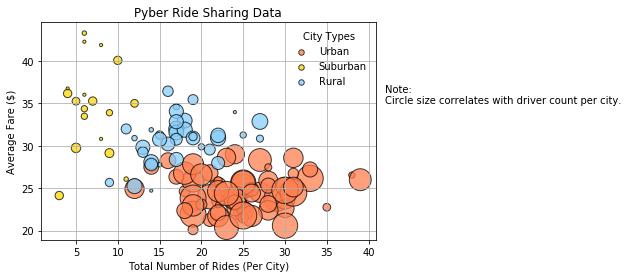

<Figure size 432x288 with 0 Axes>

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_city = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

# Urban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_urban = urban_city["ride_id"].count()
y_urban = urban_city["fare"].mean()
s_urban = urban_city["driver_count"].mean()

# Rural calculations of ride count (x), fare average(y), driver count average(s as in size)
x_rural = rural_city["ride_id"].count()
y_rural = rural_city["fare"].mean()
s_rural = rural_city["driver_count"].mean()

# Suburban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_suburban = suburban_city["ride_id"].count()
y_suburban = suburban_city["fare"].mean()
s_suburban = suburban_city["driver_count"].mean()
# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
# Create a legend
lgnd = plt.legend(labels=['Urban', 'Suburban', 'Rural'], title='City Types', loc='best', frameon=False)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
fig = plt.figure()
fig.savefig('plot.png')

plt.show()

## Total Fares by City Type

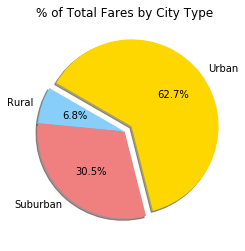

<Figure size 432x288 with 0 Axes>

In [4]:
# Calculate Type Percents
type_group= pyber_df.groupby(["type"])
fare_sum = type_group["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["lightskyblue", "lightcoral", "gold"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
fig = plt.figure()
fig.savefig('plot.jpg')
# Show Figure
plt.show()

In [5]:

plt.show()

## Total Rides by City Type

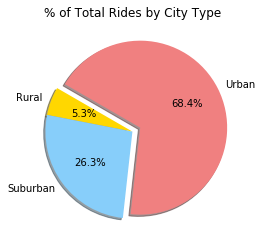

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Type Percents
rides_count = type_group['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
fig = plt.figure()
fig.savefig('plot.png')

# Show Figure
plt.show()

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

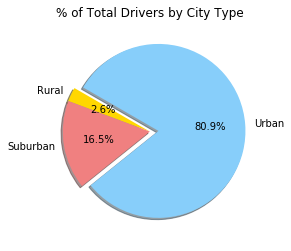

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate Type Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightcoral", "lightskyblue"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
fig = plt.figure()
fig.savefig('plot.png')

# Show Figure
plt.show()

In [9]:
# Show Figure
plt.show()